- Assumes the image being worked with is in the same directory
- Will continue working on refining the edges and working with additional images

In [1]:
import SimpleITK as sitk

import numpy as np
import os
from ipywidgets import interact, fixed, IntSlider

%matplotlib inline
import matplotlib.pyplot as plt

OUTPUT_DIR = 'output'

image_viewer = sitk.ImageViewer()

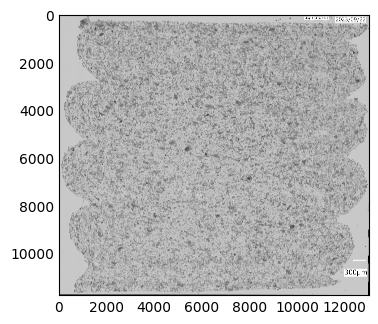

In [2]:
image_name = "04_060__150_00_01_00C_230922_2D.jpg"
image = sitk.Cast(sitk.ReadImage( image_name , sitk.sitkUInt8),sitk.sitkFloat32 )

plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(image), cmap=plt.cm.Greys_r)
plt.axis('on');


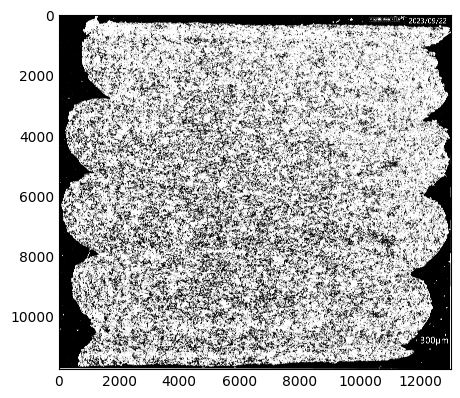

In [3]:
#Applies a binary threshold to the sample
binary_image = sitk.BinaryThreshold(image, lowerThreshold=160, upperThreshold=255, insideValue=0, outsideValue=255)

#Detects extreme black pixels in original image from text
binary_mask = sitk.BinaryThreshold(image, lowerThreshold=0, upperThreshold=20, insideValue=0, outsideValue=255)

#Masks binary image to disregard black text from label
mask_filter = sitk.MaskImageFilter()
binary_image = mask_filter.Execute(binary_image, binary_mask)


plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(binary_image), cmap=plt.cm.Greys_r)
plt.axis('on');

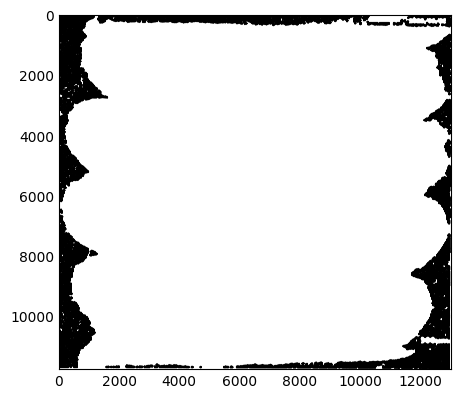

In [4]:
close_filter = sitk.BinaryMorphologicalClosingImageFilter()
close_filter.SetKernelRadius([45, 45])
close_filter.SetForegroundValue(255)

closed_image = close_filter.Execute(binary_image)

plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(closed_image), cmap=plt.cm.Greys_r)

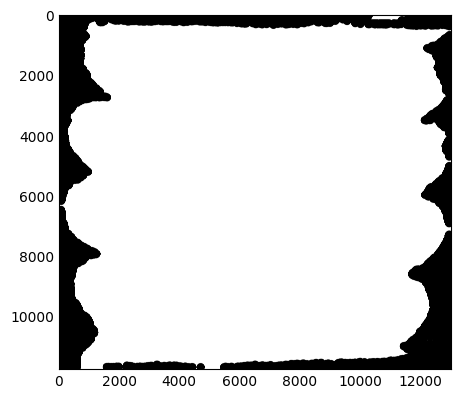

In [5]:
close_filter = sitk.BinaryErodeImageFilter()
close_filter.SetKernelRadius([90, 90])
close_filter.SetForegroundValue(255)

opened_image = close_filter.Execute(closed_image)

plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(opened_image), cmap=plt.cm.Greys_r)
plt.axis('on');

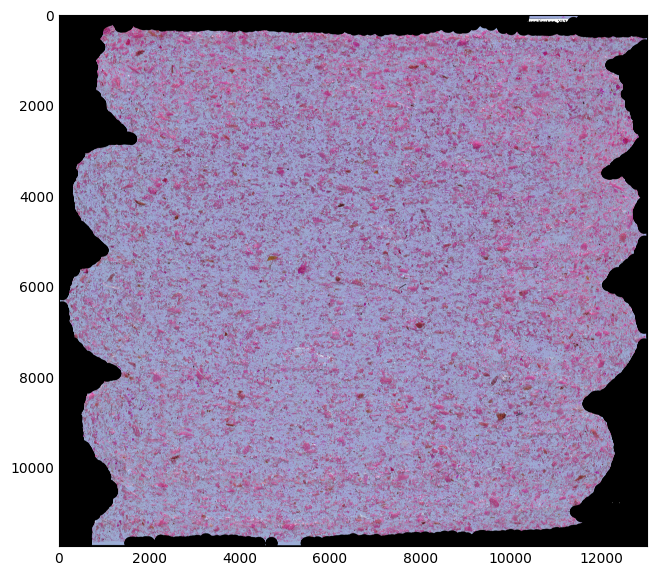

In [6]:
color_image = sitk.ReadImage(image_name)
mask_image = opened_image

binary_mask = sitk.BinaryThreshold(mask_image, lowerThreshold=1, upperThreshold=255, insideValue=1, outsideValue=0)

mask_filter = sitk.MaskImageFilter()
mask_filter.SetMaskingValue(0)
masked_color_image = mask_filter.Execute(color_image, binary_mask)

plt.figure(figsize=(6, 6))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(masked_color_image))
plt.axis('on');
